In [830]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from numpy import random
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [919]:
class LinearRegression:
    
    def __init__(self, learning_rate = 0.01, n_iters=1000, l1_penalty = None, l2_penalty = None):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.l1_penalty = l1_penalty if l1_penalty else 0
        self.l2_penalty = l2_penalty if l2_penalty else 0
        self.slopes = None
        self.intercept = None
        
    
    def fit(self, X, y):
        
        numSamples, numFeatures = X.shape
        #initialize params at zero. We have a param for each feature in the dataset and one for the intercept
        self.slopes = np.zeros(numFeatures)
        self.intercept = 0
        
        #run gradient descent until the maximum number of iterations is met (user-defined)
        for i in range(self.n_iters):
            #calculate the prediction for each observation using the current slopes/intercept
            predictions = np.dot(X, self.slopes) + self.intercept
            
            #calculate the partial derivative (gradient) of the loss function (MSE) with respect to each parameter
            #len(dSlope) = number of features
            dSlope = np.dot(X.T,(predictions-y) ) * (1/numSamples)
            #ridge (l2) penalty term. only applies if l2_penalty > 0
            dSlope += self.l2_penalty * self.slopes 
            #lasso (l1) penalty term. only applies if l1_penalty > 0
            dSlope += np.sign(self.slopes)  * self.l1_penalty
            
            dIntercept = sum(predictions-y) * (1/numSamples)
            
            #update the parameters using the calculated gradients and user-defined learning rate
            self.slopes = self.slopes - self.learning_rate * dSlope
            self.intercept = self.intercept - self.learning_rate * dIntercept
            
    def predict(self, X):
        return np.dot(X, self.slopes) + self.intercept
        
        

In [920]:
numSamples = 1000
X, y = datasets.make_regression(n_samples=numSamples, noise=10, random_state=123, n_features=1)
#add random feature to test shrinkage
X = np.hstack((X, np.atleast_2d(random.rand(numSamples)).T))
#scale features
scaler =  StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.8, random_state=123)

In [954]:
model = LinearRegression(l1_penalty=0.5, l2_penalty=0.5)
model.fit(X_train,  Y_train)
predictions = model.predict(X_test)

In [955]:
mean_squared_error(Y_test, predictions)

745.1082089317064

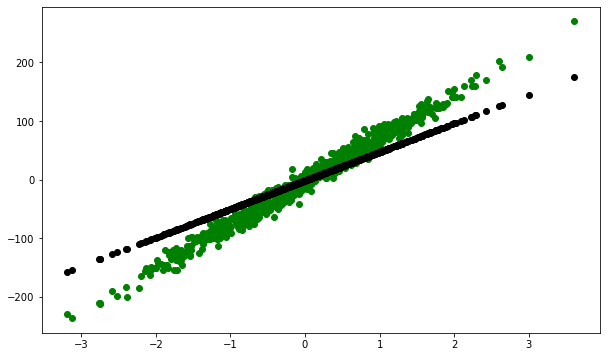

In [956]:
fig = plt.figure(figsize=(10,6))
plt.scatter(X_test[:,0], Y_test, color='green')
plt.scatter(X_test[:,0], predictions, color='black')